In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 1500, random_state = 250)

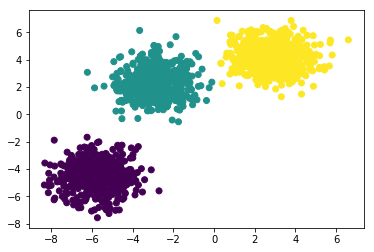

In [2]:
plt.scatter(X[:, 0], X[:, 1], c = y)

# 距离度量
本处使用欧式距离

In [3]:
def get_distance(X,Y):
    return np.sqrt(np.sum((X-Y)**2,axis=1))

# KNN算法
1. 求当前预测点与现有点的距离
2. 将所求距离按照从小到大排序
3. 求出最小的K个比邻值的出现频率最多的label
4. 返回所求label

In [4]:
def KNN(new,k,X,Y):
    distances = get_distance(new,X)
    sorted_arg_index = np.argsort(distances)
    counters = {}
    
    for i in range(k):
        label = Y[sorted_arg_index[i]]
        counters[label] = counters.get(label,0) + 1
            
    res = 0
    maxCount = 0
    for key,value in counters.items():
        if value > maxCount:
            maxCount = value
            res = key
    
    return res

In [5]:
test_X = [0,1.5]
test_Y = KNN(test_X,15,X,y)
test_Y

1